In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("wine_data.csv")

In [14]:
df

,Class label,Alcohol,Matlic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


In [6]:
df = pd.read_csv('wine_data.csv', header = None, usecols = [0,1,2])
df.columns = ["Class label", "Alcohol", 'Matlic acid']

In [7]:
df.head()

,Class label,Alcohol,Matlic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [8]:
df.shape

(178, 3)

C:\python3.7\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Alcohol', ylabel='Density'>

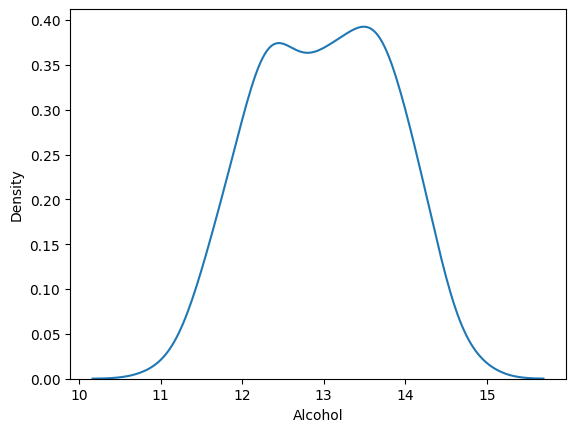

In [9]:
sns.kdeplot(df['Alcohol'])

C:\python3.7\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Matlic acid', ylabel='Density'>

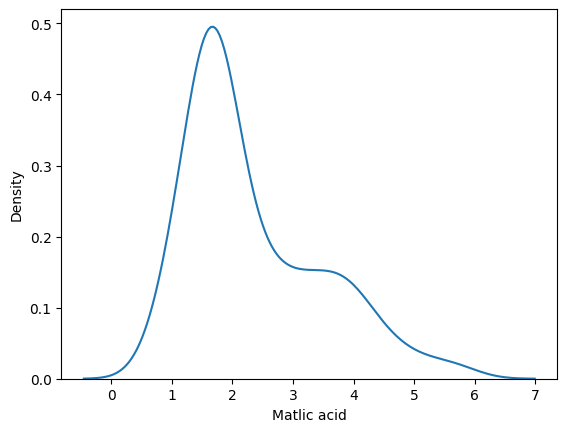

In [10]:
sns.kdeplot(df['Matlic acid'])

<Axes: xlabel='Alcohol', ylabel='Matlic acid'>

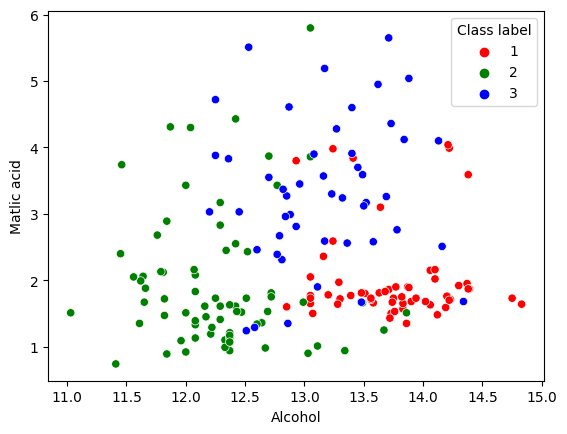

In [13]:
color_dict = {1:'red', 2:'green', 3:'blue'}
sns.scatterplot(x= df['Alcohol'], y = df['Matlic acid'], hue = df['Class label'], palette = color_dict)

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('Class label', axis = 1), df['Class label'], test_size = 0.3, random_state = 0)
X_train.shape, X_test.shape

((124, 2), (54, 2))

In [16]:
from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()

# fit the scaler to the train set, it will learn the parameters
scaler.fit(X_train)

# transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = X_test.columns)

In [19]:
X_train_scaled

,Alcohol,Matlic acid
0,0.720430,0.203782
1,0.319892,0.084034
2,0.602151,0.712185
3,0.572581,0.563025
4,0.760753,0.130252
...,...,...
119,0.212366,0.174370
120,0.360215,0.058824
121,0.373656,0.151261
122,0.771505,0.165966


In [20]:
np.round(X_train.describe(), 1)

,Alcohol,Matlic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [22]:
np.round(X_train_scaled.describe(), 1)

,Alcohol,Matlic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


Text(0.5, 1.0, 'After Scaling')

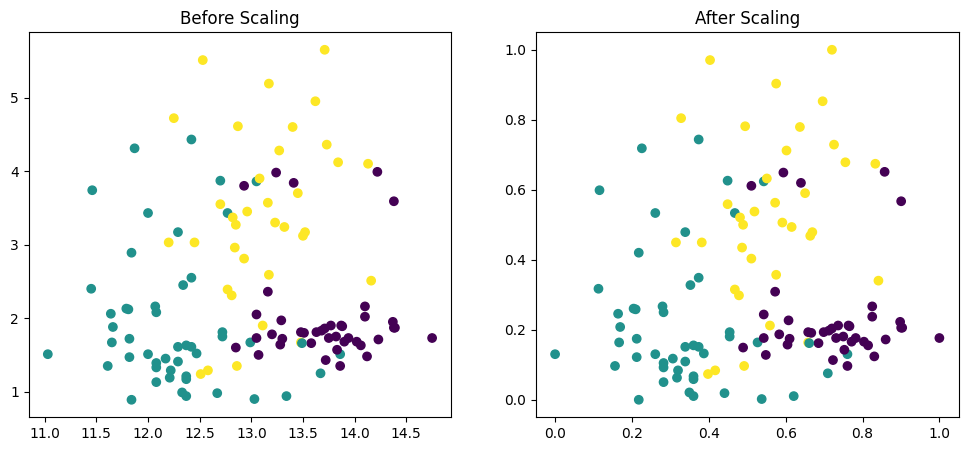

In [30]:
fig, (ax1, ax2)  = plt.subplots(ncols =2, figsize = (12,5))

ax1.scatter(X_train['Alcohol'], X_train['Matlic acid'], c= y_train)
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Alcohol'], X_train_scaled['Matlic acid'], c=y_train)
ax2.set_title("After Scaling")

C:\python3.7\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\python3.7\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\python3.7\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\python3.7\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

<Axes: title={'center': 'After Scaling'}, xlabel='Alcohol', ylabel='Density'>

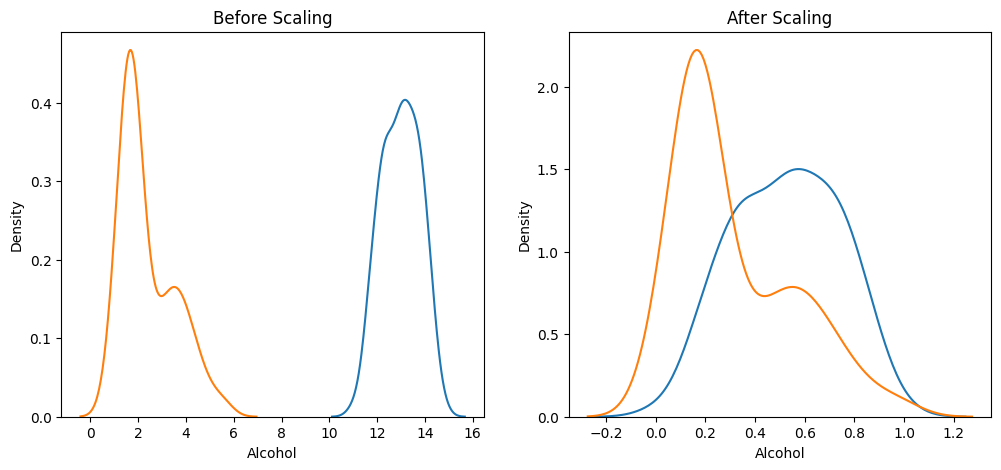

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize = (12, 5))

ax1.set_title("Before Scaling")
sns.kdeplot(X_train['Alcohol'], ax = ax1)
sns.kdeplot(X_train['Matlic acid'], ax = ax1)

ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)
sns.kdeplot(X_train_scaled['Matlic acid'], ax = ax2)

C:\python3.7\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\python3.7\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: title={'center': 'Alcohol Distribution after scaling'}, xlabel='Alcohol', ylabel='Density'>

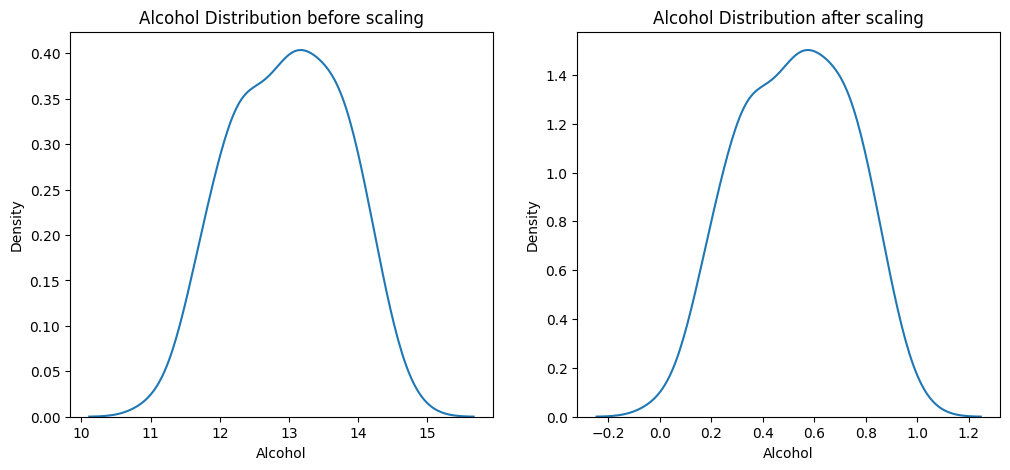

In [35]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title("Alcohol Distribution before scaling")
sns.kdeplot(X_train['Alcohol'], ax = ax1)

ax2.set_title("Alcohol Distribution after scaling")
sns.kdeplot(X_train_scaled['Alcohol'], ax = ax2)

In [1]:
fig, (ax1,ax2) = plt.subplots(ncols = 2, figsize = (12,5))

ax1.set_title("Matlic acid Distribution before scaling")
sns.kdeplot(X_train['Matlic acid'], ax = ax1)

ax2.set_title("Matlic acid Distribution after scaling")
sns.kdeplot(X_train_scaled['Matlic acid'], ax = ax2)

NameError: name 'plt' is not defined